# 🌱 Crop Disease Detection & Advisory System

## Radhe Radhe🕉️💕
<pre>
A complete end-to-end machine learning project for detecting crop diseases from leaf images &
providing basic advisory support.
</pre>
###📌 Project Overview
 <pre> Agriculture plays a vital role in food security. Plant diseases significantly reduce crop yield and quality.</pre>
#### This project aims to:
 - Automatically identify crop diseases from leaf images
 - Support multiple crops and disease types in one unified system
 - Reduce dependency on manual inspection
 - Provide a foundation for a smart agricultural advisory tool

### 🎯 Project Goals
 - Multi-crop disease classification
 - High accuracy with limited hardware resources
 - Simple, scalable, and modular design
 - Academic + real-world usability


# Data Exploration & Understanding Notebook
### 🎯 Goal of This Notebook
<pre>
The goal of this notebook is to explore, understand, &
validate the crop disease image dataset before preprocessing &model training.

It ensures the dataset structure is correct, classes are properly organized, image formats are valid, &
there are no critical issues such as missing data, corrupted images, or severe class imbalance.</pre>
#### This notebook answers:
 - What crops and diseases are present?
 - How many images per class?
 - Are image formats and sizes consistent?
 - Is the dataset suitable for CNN training?


### Clone the GitHub Repository
<pre>
📌 Purpose

 To obtain the complete project structure locally for exploration and experimentation.
</pre>

In [1]:
# Clone the Repository
!git clone https://github.com/sabin74/Agriculture-Crop-Disease-Detection-Advisory-System.git


Cloning into 'Agriculture-Crop-Disease-Detection-Advisory-System'...
remote: Enumerating objects: 97026, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 97026 (delta 19), reused 70 (delta 17), pack-reused 96945 (from 1)
Receiving objects: 100% (97026/97026), 1.50 GiB | 31.25 MiB/s, done.
Resolving deltas: 100% (421/421), done.
Updating files: 100% (94761/94761), done.


In [2]:
# Set Project Root
import os
os.chdir("/content/Agriculture-Crop-Disease-Detection-Advisory-System")
print("Current Directory: ", os.getcwd())

Current Directory:  /content/Agriculture-Crop-Disease-Detection-Advisory-System


### Import Required Python Libraries
<pre>
📌 Purpose

The purpose of this step is to import all essential Python libraries required for
dataset exploration, inspection, and visualization.
</pre>

In [3]:
# Core System & Path Handling
import os
from pathlib import Path

# Numerical and Tabular Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image Processing
import cv2
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Utilities
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Visualization Settings
plt.style.use("seaborn-v0_8")
sns.set_theme()
plt.rcParams['figure.figsize'] = (15,8)

### Define Dataset Paths
<pre>
📌 Purpose

The purpose of this step is to centralize all dataset directory paths in one place
so they can be reused consistently across the notebook.

In [4]:
# Define Dataset Root Directory
DATASET_ROOT = Path("Modeling/Crop Disease Dataset")

#Define Individual Dataset Split
TRAIN_DIR = DATASET_ROOT / "train"
TEST_DIR = DATASET_ROOT / "test"
VALID_DIR = DATASET_ROOT / "valid"

# Display Path
print(f"Train Directory: {TRAIN_DIR}")
print(f"Test Directory: {TEST_DIR}")
print(f"Valid Directory: {VALID_DIR}")

Train Directory: Modeling/Crop Disease Dataset/train
Test Directory: Modeling/Crop Disease Dataset/test
Valid Directory: Modeling/Crop Disease Dataset/valid


# 6: List All Crops and Classes
<pre>
📌 Purpose

The purpose of this step is to programmatically identify all crops and their corresponding disease &
healthy classes present in the dataset.

In [5]:
# Crop folder list
crop_folders = sorted([folder.name for folder in TRAIN_DIR.iterdir() if folder.is_dir()])

print(f"Total Number of Crops: {len(crop_folders)}")
print("Crop Folders:")
for folder in crop_folders:
    print(f"- {folder}")

Total Number of Crops: 13
Crop Folders:
- apple
- banana
- cherry
- coffee
- corn
- grape
- mango
- orange
- peach
- potato
- strawberry
- sugarcane
- tomato


In [6]:
crop_folders

['apple',
 'banana',
 'cherry',
 'coffee',
 'corn',
 'grape',
 'mango',
 'orange',
 'peach',
 'potato',
 'strawberry',
 'sugarcane',
 'tomato']

In [7]:
# Extract Disease and Healthy Class Names
class_name = []

for crop in crop_folders:
  crop_path = TRAIN_DIR / crop
  for cls in crop_path.iterdir():
    if cls.is_dir():
      class_name.append(cls.name)

# Sort & remove duplicates
class_name = sorted(list(set(class_name)))

print(f"Total Number of Classes: {len(class_name)}")
print("Class Names:")
for cls in class_name:
    print(f"- {cls}")

Total Number of Classes: 45
Class Names:
- Apple__Apple_scab
- Apple__Black_rot
- Apple__Cedar_apple_rust
- Apple__healthy
- Banana__Healthy_Leaf
- Banana__Panama_Disease
- Banana__Sigatoka_Disease
- Cherry_(including_sour)__Powdery_mildew
- Cherry_(including_sour)__healthy
- Coffee__NoRust
- Coffee__Rust
- Corn_(maize)__Cercospora_leaf_spot Gray_leaf_spot
- Corn_(maize)__Common_rust_
- Corn_(maize)__Northern_Leaf_Blight
- Corn_(maize)__healthy
- Grape__Black_rot
- Grape__Esca_(Black_Measles)
- Grape__Leaf_blight_(Isariopsis_Leaf_Spot)
- Grape__healthy
- Mango__Anthracnose
- Mango__Healthy
- Mango__Powdery_Mildew
- Orange__Haunglongbing_(Citrus_greening)
- Peach__Bacterial_spot
- Peach__healthy
- Potato__Early_blight
- Potato__Late_blight
- Potato__healthy
- Strawberry__Leaf_scorch
- Strawberry__healthy
- Sugarcane__Mosaic
- Sugarcane__RedRot
- Sugarcane__RedRust
- Sugarcane__Yellow_Rust
- Sugarcane__healthy
- Tomato__Bacterial_spot
- Tomato__Early_blight
- Tomato__Late_blight
- Tomato

### Count Images Per Class
<pre>
📌 Purpose

The purpose of this step is to quantify the number of images available for each disease
and healthy class in the dataset.

In [8]:
# Supported Images Extension
IMAGE_EXTENSIONS = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']

records = []
for crop in crop_folders:
    crop_name = crop
    for cls in crop_path.iterdir():
        if cls.is_dir():
            image_count = len([
                img for img in cls.iterdir()
                if img.suffix.lower() in IMAGE_EXTENSIONS
            ])

            records.append({
                "Crop": crop,
                "Class":cls.name,
                "Image Count": image_count
            })

# Creae Dataframe
class_distribution_df = pd.DataFrame(records)


In [9]:

# Display DataFrame
class_distribution_df

,Crop,Class,Image Count
0,apple,Tomato__Target_Spot,1827
1,apple,Tomato__Spider_mites Two-spotted_spider_mite,1741
2,apple,Tomato__Leaf_Mold,1882
3,apple,Tomato__Tomato_Yellow_Leaf_Curl_Virus,1961
4,apple,Tomato__Tomato_mosaic_virus,1790
...,...,...,...
125,tomato,Tomato__Late_blight,1851
126,tomato,Tomato__Early_blight,1920
127,tomato,Tomato__Septoria_leaf_spot,1745
128,tomato,Tomato__Bacterial_spot,1702


In [10]:
# Crop Distribution Table
crop_distribution_df = class_distribution_df.groupby("Crop")["Image Count"].sum().reset_index()
crop_distribution_df.columns = ["Crop", "Total Images"]
crop_distribution_df

,Crop,Total Images
0,apple,18345
1,banana,18345
2,cherry,18345
3,coffee,18345
4,corn,18345
5,grape,18345
6,mango,18345
7,orange,18345
8,peach,18345
9,potato,18345


In [11]:
# Display Basic Statics
class_distribution_df.describe()

,Image Count
count,130.000000
mean,1834.500000
std,84.324057
min,1702.000000
25%,1745.000000
50%,1839.000000
75%,1920.000000
max,1961.000000


In [12]:
# Sort by Image Count
class_distribution_df.sort_values(by="Image Count")

,Crop,Class,Image Count
8,apple,Tomato__Bacterial_spot,1702
18,banana,Tomato__Bacterial_spot,1702
28,cherry,Tomato__Bacterial_spot,1702
38,coffee,Tomato__Bacterial_spot,1702
48,corn,Tomato__Bacterial_spot,1702
...,...,...,...
103,strawberry,Tomato__Tomato_Yellow_Leaf_Curl_Virus,1961
23,cherry,Tomato__Tomato_Yellow_Leaf_Curl_Virus,1961
43,corn,Tomato__Tomato_Yellow_Leaf_Curl_Virus,1961
123,tomato,Tomato__Tomato_Yellow_Leaf_Curl_Virus,1961


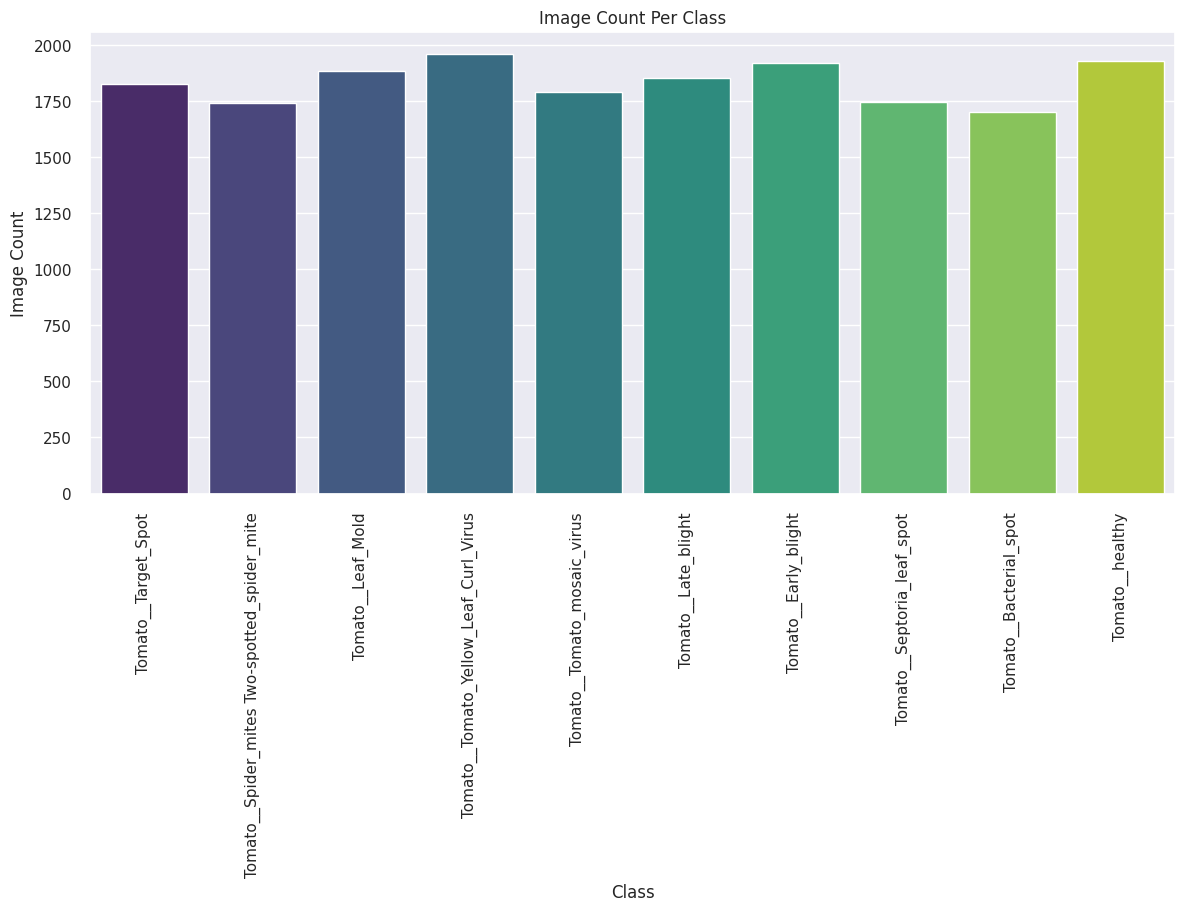

In [13]:
# Visualization Image Per Class
plt.figure(figsize=(14, 6))
sns.barplot(
    x="Class",
    y="Image Count",
    data=class_distribution_df,
    palette="viridis"
)
plt.xticks(rotation=90)
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.title("Image Count Per Class")
plt.show()

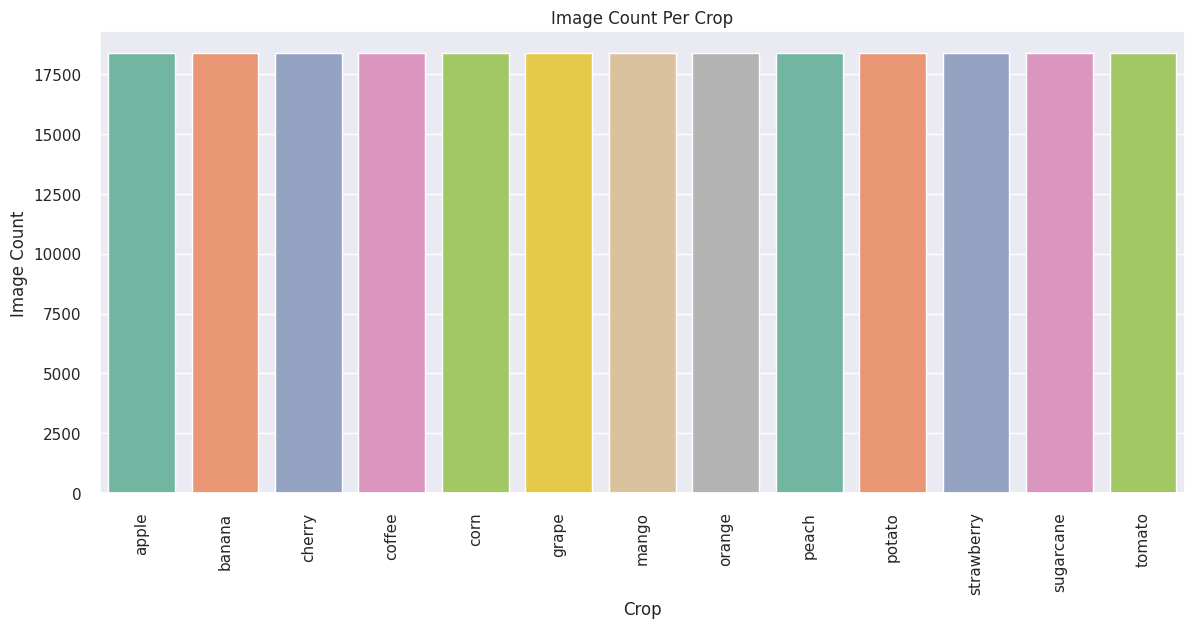

In [14]:
# Crop Wise Image Distribution
plt.figure(figsize=(14, 6))
sns.barplot(
    x="Crop",
    y="Total Images",
    data=crop_distribution_df,
    palette="Set2"
)
plt.xticks(rotation=90)
plt.xlabel("Crop")
plt.ylabel("Image Count")
plt.title("Image Count Per Crop")
plt.show()

### Analyze Dataset Split Consistency
<pre>
<b>📌 Purpose</b>

The purpose of this step is to verify consistency between dataset splits, ensuring that:

 - Training and validation sets contain the same classes
 - No disease or healthy class is missing in the validation set
 - The test set is unlabeled and suitable only for final evaluation

In [15]:
# Extract Class Name From Train and Validation

def extract_classes(split_dir):
    classes = set()
    for crop in split_dir.iterdir():
        if crop.is_dir():
            for cls in crop.iterdir():
                if cls.is_dir():
                    classes.add(cls.name)
    return classes

# Extract Classes
train_classes = extract_classes(TRAIN_DIR)
valid_classes = extract_classes(VALID_DIR)

print(f"Total Classes in Train Set: {len(train_classes)}")
print(f"Total Classes in Validation Set: {len(valid_classes)}")

Total Classes in Train Set: 45
Total Classes in Validation Set: 45


In [16]:
# Compare Train vs Validation Classes
missing_in_valid = train_classes - valid_classes
extra_in_valid = valid_classes - train_classes

print(f"Classes Missing in Validation Set: {missing_in_valid}")
print(f"Classes Extra in Validation Set: {extra_in_valid}")

Classes Missing in Validation Set: set()
Classes Extra in Validation Set: set()


In [17]:
# Verify Test Set
test_subdirs = [d for d in TEST_DIR.iterdir() if d.is_dir()]
print(f"Total Subdirectories in Test Directory: {len(test_subdirs)}")

if len(test_subdirs) == 0:
    print("Test Set is Unlabeled and Suitable for Final Evaluation.")
else:
    print("Test Set contains both labeled and unlabeled data.")
    for subdir in test_subdirs:
        print(f"- {subdir.name}")



Total Subdirectories in Test Directory: 0
Test Set is Unlabeled and Suitable for Final Evaluation.


### Inspect Image Formats
<pre>
📌 Purpose

The purpose of this step is to verify that the dataset contains acceptable image formats &
to confirm that using mixed image formats is safe for TensorFlow/Keras-based CNN models.

In [18]:
# Count Image Formats
VALID_EXTENSIONS = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']

format_counter = Counter()

for crop in TRAIN_DIR.iterdir():
    if crop.is_dir():
        for cls in crop.iterdir():
            if cls.is_dir():
                for img in cls.iterdir():
                    if img.suffix.lower() in VALID_EXTENSIONS:
                        format_counter[img.suffix.lower()] += 1

format_counter

Counter({'.jpg': 67494, '.jpeg': 3287})

In [19]:
# Convert fo Data Frame
format_df = pd.DataFrame(
    format_counter.items(),
    columns=["Image_Format", "Count"]
).sort_values(by='Count', ascending=False)

# Display DataFrame
format_df

,Image_Format,Count
0,.jpg,67494
1,.jpeg,3287


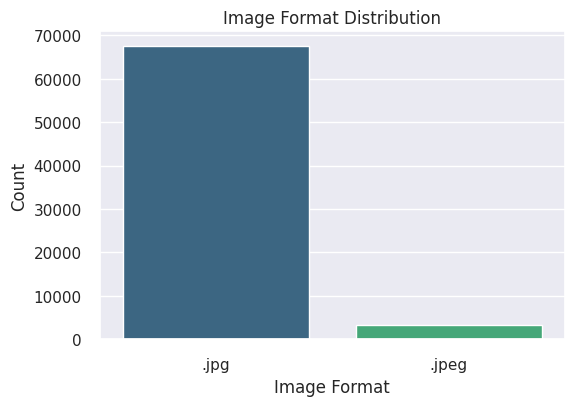

In [20]:
# Visualization Image Format Distribution
plt.figure(figsize=(6, 4))
sns.barplot(
    x="Image_Format",
    y="Count",
    data=format_df,
    palette="viridis"
)
plt.title('Image Format Distribution')
plt.xlabel("Image Format")
plt.ylabel("Count")
plt.title("Image Format Distribution")
plt.show()

### Inspect Image Dimensions & Channels
<pre>
<b>📌 Purpose
</b>
The purpose of this step is to analyze image dimensions and color channels across the dataset.

In [21]:
# Get Random images
import random

def get_random_images(base_dir, num_samples=5):
    image_paths = []
    for crop in base_dir.iterdir():
        if crop.is_dir():
            for cls in crop.iterdir():
                if cls.is_dir():
                    images = [
                        img for img in cls.iterdir()
                        if img.suffix.lower() in (".jpg", ".jpeg", ".png")
                    ]
                    if images:
                        image_paths.append(random.choice(images))
    return random.sample(image_paths, min(num_samples, len(image_paths)))


In [22]:
# Get random images from training set
sample_images = get_random_images(TRAIN_DIR, num_samples=12)

for img_path in sample_images:
    img = cv2.imread(str(img_path))
    if img is not None:
        height, width, channels = img.shape
        print(f"Image: {img_path.name}")
        print(f"Size: {width} x {height}")
        print(f"Channels: {channels}")
        print("-" * 40)

Image: 0b3e5032-8ae8-49ac-8157-a1cac3df01dd___RS_HL 1817_flipTB.JPG
Size: 256 x 256
Channels: 3
----------------------------------------
Image: 30.jpg
Size: 224 x 224
Channels: 3
----------------------------------------
Image: 270ba8ed-21f5-43cc-b401-7b643ce5f65d___R.S_HL 8090 copy 2_flipLR.jpg
Size: 256 x 256
Channels: 3
----------------------------------------
Image: cfb93659-94c6-4ff3-8104-bae70c975bde___RS_HL 5666_flipTB.JPG
Size: 256 x 256
Channels: 3
----------------------------------------
Image: 1050.JPG
Size: 168 x 311
Channels: 3
----------------------------------------
Image: ddcf9afc-8a06-4778-8eba-95f8efe65be3___Mt.N.V_HL 6201_90deg.JPG
Size: 256 x 256
Channels: 3
----------------------------------------
Image: 2c4f9430-88b0-4796-a4b1-5dd262650f40___Matt.S_CG 6195.JPG
Size: 256 x 256
Channels: 3
----------------------------------------
Image: 24695149-1c3d-406e-8468-086d5020a7a5___JR_HL 4282_180deg.JPG
Size: 256 x 256
Channels: 3
----------------------------------------
Im

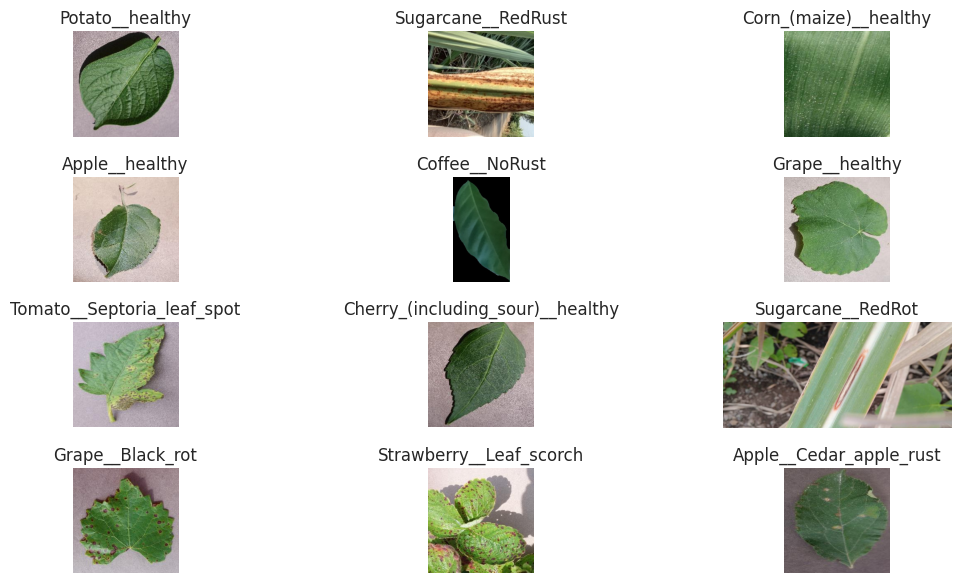

In [23]:
# Visualize Sample Images
plt.figure(figsize=(12, 6))

for i, img_path in enumerate(sample_images):
    img = Image.open(img_path)
    plt.subplot(4, 3, i + 1)
    plt.imshow(img)
    plt.title(img_path.parent.name)
    plt.axis("off")

plt.tight_layout()
plt.show()
